# Livrable 2 - Image processing

## The subject
The goal is to process a set of photographs by denoising them in order to make them better processable by Machine Learning algorithms. In this Jupyter notebook we will explain the pre-processing steps. The algorithms will rely on convolutional auto-encoders, and apply them to improve the image quality.

## Import

### Disable Tensorflow's warnings

In [2]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
RUN_DIR = 'tf/'

In [38]:
import tensorflow as tf
import numpy as np
from skimage.transform import resize
from keras.preprocessing import image
from matplotlib import pyplot as plt

## Global Variables

In [4]:
BATCH_SIZE: int = 64
IMG_HEIGHT: int = 228
IMG_WIDTH: int = 228
EPOCHS: int = 10
NO_NOISY_DATASET_PATH: str = RUN_DIR + 'data_ae/no_noisy'
NOISY_DATASET_PATH: str = RUN_DIR + 'data_ae/noisy'

## Load dataset

In [6]:
# Train
train_data = tf.keras.utils.image_dataset_from_directory(RUN_DIR + '/data_ae/no_noisy/training',
                                                         image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size=BATCH_SIZE)
# Train noisy
train_noisy_data = tf.keras.utils.image_dataset_from_directory(RUN_DIR + '/data_ae/noisy/training',
                                                               image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               batch_size=BATCH_SIZE)

# Test
test_data = tf.keras.utils.image_dataset_from_directory(RUN_DIR + '/data_ae/no_noisy/validation',
                                                        image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        batch_size=BATCH_SIZE)
# Test noisy
test_noisy_data = tf.keras.utils.image_dataset_from_directory(RUN_DIR + '/data_ae/noisy/validation',
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

Found 7999 files belonging to 1 classes.
Found 7999 files belonging to 1 classes.
Found 1000 files belonging to 1 classes.
Found 1000 files belonging to 1 classes.


### Load datasets in cache to optimize training time

In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
train_noisy_data = train_noisy_data.cache().prefetch(buffer_size=AUTOTUNE)

## Implementation of functions to display the images.

In [65]:
def display_single_image(img):
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")


def display_image(x, n):
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(x[i], vmax=1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

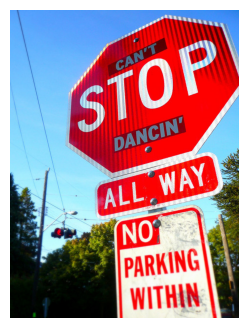

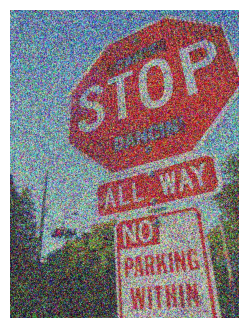

In [35]:
#Print an image of both datasets for testing
img = image.image_utils.load_img(NO_NOISY_DATASET_PATH + '/training/photo/photo_0003.jpg')
img_noisy = image.image_utils.load_img(NOISY_DATASET_PATH + '/training/photo/photo_0003.jpg')

display_single_image(np.array(img))
display_single_image(np.array(img_noisy))

Training set


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


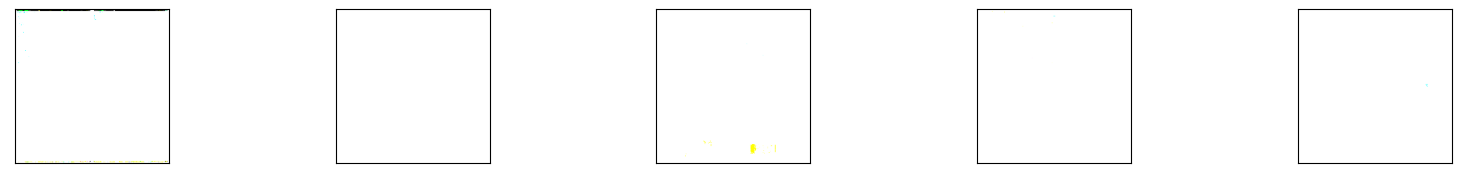

Noisy training set


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


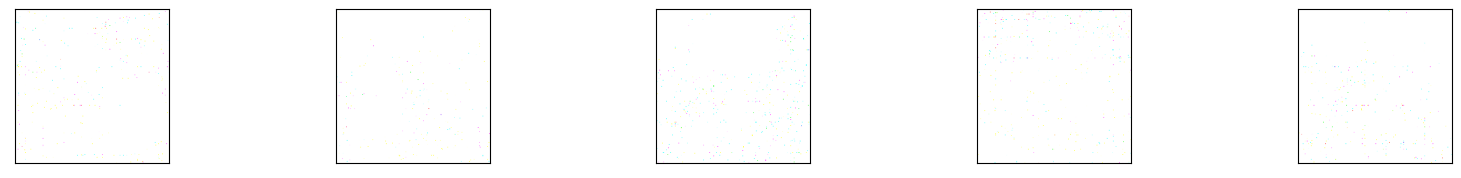

Validation Set


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


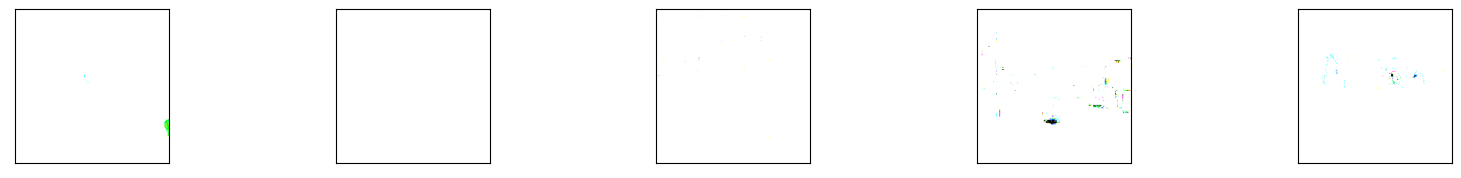

Noisy validation set


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


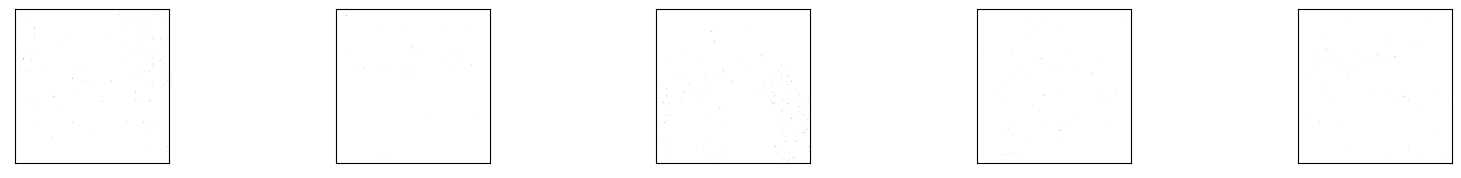

In [66]:

print("Training set")
display_image(list(train_data.take(1))[0][0], 5)
print("Noisy training set")
display_image(list(train_noisy_data.take(1))[0][0], 5)

print("Validation Set")
display_image(list(test_data.take(1))[0][0], 5)
print("Noisy validation set")
display_image(list(test_noisy_data.take(1))[0][0], 5)

## Encoder

In [ ]:
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

encoder = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(inputs)
encoder = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder)
encoder = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
encoder = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder)

## Decoder

In [ ]:
decoder = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(
    encoder)
decoder = tf.keras.layers.UpSampling2D((2, 2))(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(
    decoder)
decoder = tf.keras.layers.UpSampling2D((2, 2))(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same')(
    decoder)

## Auto encoder

In [ ]:
auto_encoder = tf.keras.Model(inputs, decoder, name="auto_encoder")

auto_encoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')

### Load datasets in cache to optimize training time

In [ ]:
x_train_noisy = tf.data.Dataset.from_tensor_slices(train_data_noisy)
x_train = tf.data.Dataset.from_tensor_slices(train_data)
x_test_noisy = tf.data.Dataset.from_tensor_slices(test_data_noisy)
x_test = tf.data.Dataset.from_tensor_slices(test_data)

AUTOTUNE = tf.data.AUTOTUNE
x_train_noisy = x_train_noisy.cache().prefetch(buffer_size=AUTOTUNE)
x_train = x_train.cache().prefetch(buffer_size=AUTOTUNE)

## Save the best model

In [ ]:
filename = run_dir + "models/best_model.h5"
callback_best_model = tf.keras.callbacks.ModelCheckpoint(filepath=filename, verbose=0, save_best_only=True)

## Train the model

In [ ]:
auto_encoder.summary()

history = auto_encoder.fit(train_data_noisy, train_data,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           verbose=1,
                           shuffle=True,
                           validation_data=(test_data, test_data_noisy),
                           #callbacks=[callback_best_model]
                           )